<a href="https://colab.research.google.com/github/nyamskamau/Titanic-and-Spambase-datasets-analysis/blob/main/KNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Defining the Question

>* To determine whether a Passanger Survived or died during the sinking of the Titanic in 1912.

# 2.Metric for Success
>* To obtain an accuracy score of at least 85% for my model.

# 3.The Context

>* The Titanic was a ship that sunk in the year 1912. 
Thus given the dataset with information of the passengers we would like to determine whether a passenger survived the incident or not.

# 4.The Experimental Design Taken

>* This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data.
>* Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset
>* Finally I will build  KNN  models and evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

#5.The Appropriateness of the data to answer the given question.

>* Given the Question at hand the data provided was appropriate for my analysis

## Loading the dataset and the appropriate libraries

> I loaded my datasets and the appropriate libraries for my analysis.
> I then previewed the datasets and obtained information on the datatypes of the columns.


The column descriptions for the dataset were:
1. Survival - Survival (0 = No; 1 = Yes)
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [58]:
# Importing my Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


>* I first importing the Training set of the data and then the Test set.

In [59]:
# Importing my dataset
train = pd.read_csv('train.csv')

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [62]:
train.shape

(891, 12)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Importing the Test Data

In [64]:
test = pd.read_csv('test.csv')

In [65]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [67]:
test.shape

(418, 11)

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Cleaning

In [69]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> *  I first checked for duplicated entries in my dataset.

In [70]:
train.duplicated().sum()

0

>* Finally I dropped the unnecessary columns from my dataset.

In [71]:
train.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

>* I then cleaned both datasets , checking for null entries or duplicated entries in my columns.

In [72]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

>* The Age column had 177 null entries.
>* I obtained the mean age of the passengers in my dataset by Passenger Class and Sex and then filled the null values on the Age columns with these means.

In [73]:
train.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [74]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if (Pclass == 1) & (Sex == 'female') :
            return 34
        elif (Pclass == 1) and (Sex == 'male'):
            return 41
        elif (Pclass == 2 ) and (Sex == 'female'):
          return 28
        elif (Pclass == 2) and (Sex == 'male'):
          return 30
        elif (Pclass == 3) and (Sex == 'female'):
          return 22
        elif (Pclass == 3) and (Sex == 'male'):
          return 22
    else:
        return Age

        

In [75]:
train['Age'] = train[['Age', 'Pclass','Sex']].apply(age_approx, axis=1)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


>* Finally I dropped any null entries that were still within my dataset.

In [77]:
train.dropna(inplace=True)

In [78]:
train.isnull().sum().sum()

0

## Exploratory Data Analysis

In [79]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,28.785343,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.402915,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>* I then carried out my EDA on the Training Dataset that I would then use to build the model.

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


>* Next I plotted countplots for my categorical variables.

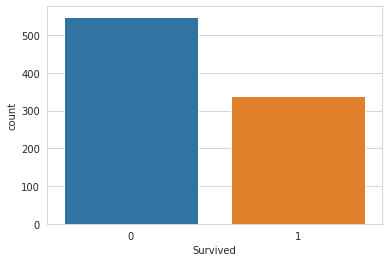

In [81]:
sns.countplot(x = "Survived",data = train)

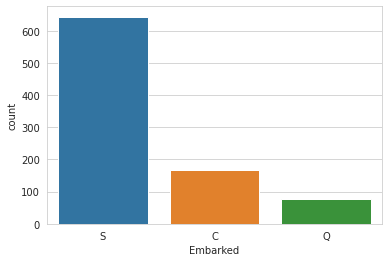

In [82]:
sns.countplot(x = "Embarked",data = train)

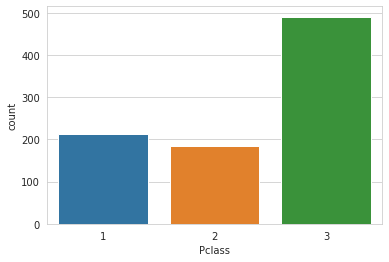

In [83]:
sns.countplot(x = "Pclass",data = train)

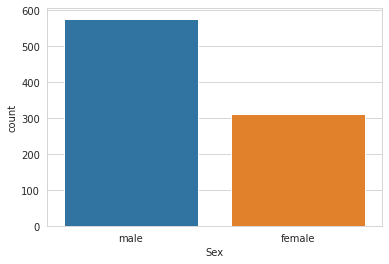

In [84]:
sns.countplot(x = "Sex",data = train)

>* From the countplots I made the observation that :
>     * Majority of the passengers were male
>     * Many of the Passengers had embarked from Southampton
>     * Many of the Passengers didnot survive the Incident
>     * Majority of the Passengers on the Titanic were in the third class.

Text(0.5, 1.0, 'Frequency Plots of  Passengers who Survived based on Gender')

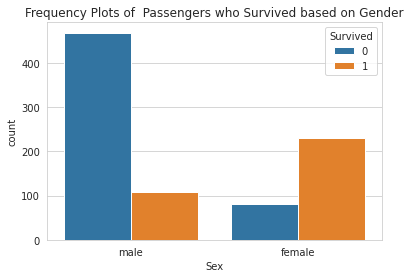

In [85]:
sns.countplot(x=train["Sex"],hue = train["Survived"],data = train)
plt.title('Frequency Plots of  Passengers who Survived based on Gender')

>* Many of the male passengers died whereas many of the female passengers aboard the Titanic survived.

Text(0.5, 1.0, 'Frequency plots of Passengers who Survived on the Titanic by  Class')

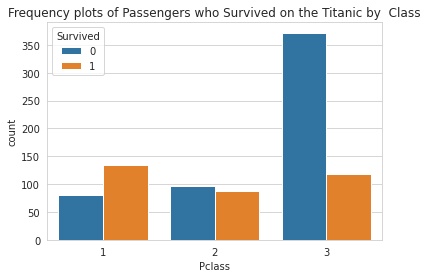

In [86]:
sns.countplot(x=train["Pclass"],hue = train["Survived"],data = train)
plt.title('Frequency plots of Passengers who Survived on the Titanic by  Class')

>* In  the first class more passengers survived compared to those that died whereas in the other Passenger classes the opposite is true.
>* THe third class had the highest amount of tragedies averaging at 375 deaths.

Text(0.5, 1.0, 'Frequency plots of Passenger Class on the Titanic by Gender')

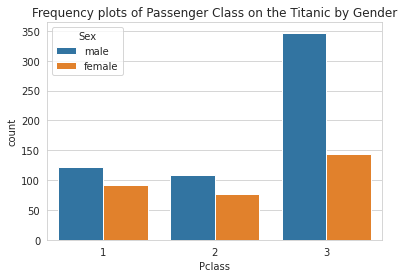

In [87]:
sns.countplot(x=train["Pclass"],hue = train["Sex"],data = train)
plt.title('Frequency plots of Passenger Class on the Titanic by Gender')

>* Many of the Passengers in the third class were male.
Furthermore most of the Passenegers in the Titanic were in the third class.

>* I then plotted pairplots for the continuous variables in my dataset.

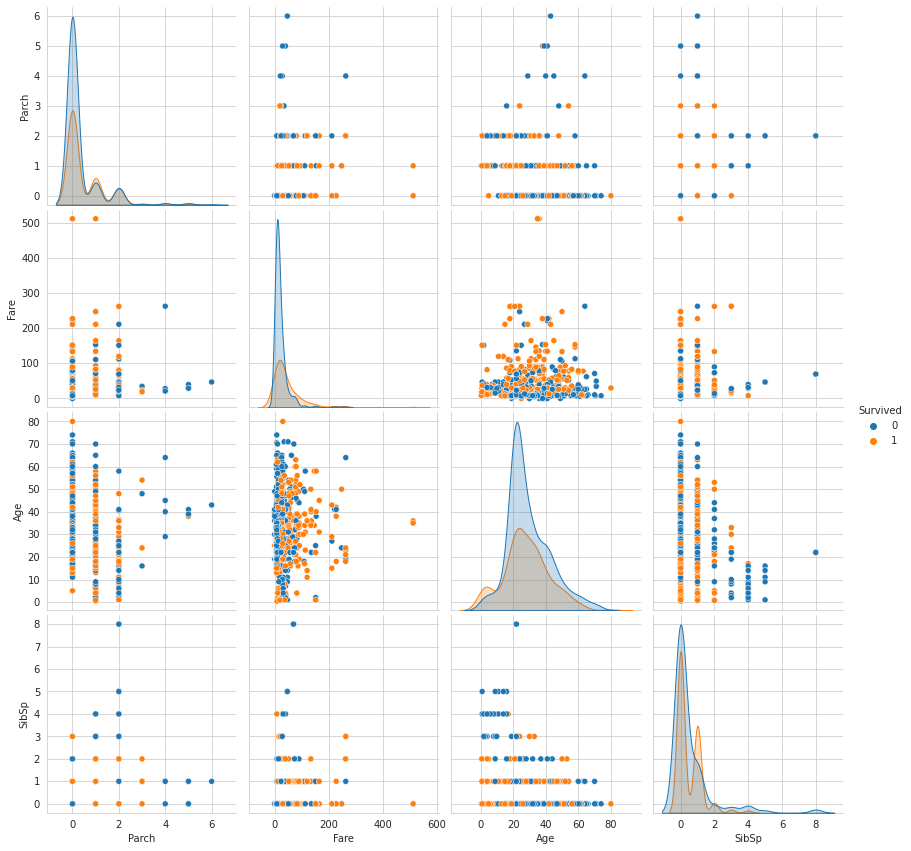

In [88]:
sns.pairplot(train[["Survived","Parch","Fare","Age",'SibSp']], hue="Survived", height=3);
plt.show()

Text(0.5, 1.0, 'Boxplot of Passenger Age by Class')

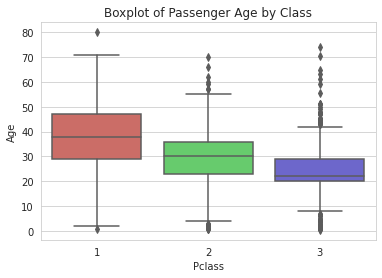

In [89]:
# Plotting a boxplot for Passenger class and Age
sns.boxplot(x='Pclass', y='Age', data=train, palette='hls')
plt.title('Boxplot of Passenger Age by Class')

>* From the boxplot we can see that the average age in the first class was 40 , second was 30 and third was 23 ,on average.
>* While there were outliers in the Ages I did not drop them as the data presented was based on real events and thus dropping these would make my analysis slightly inaccurate.

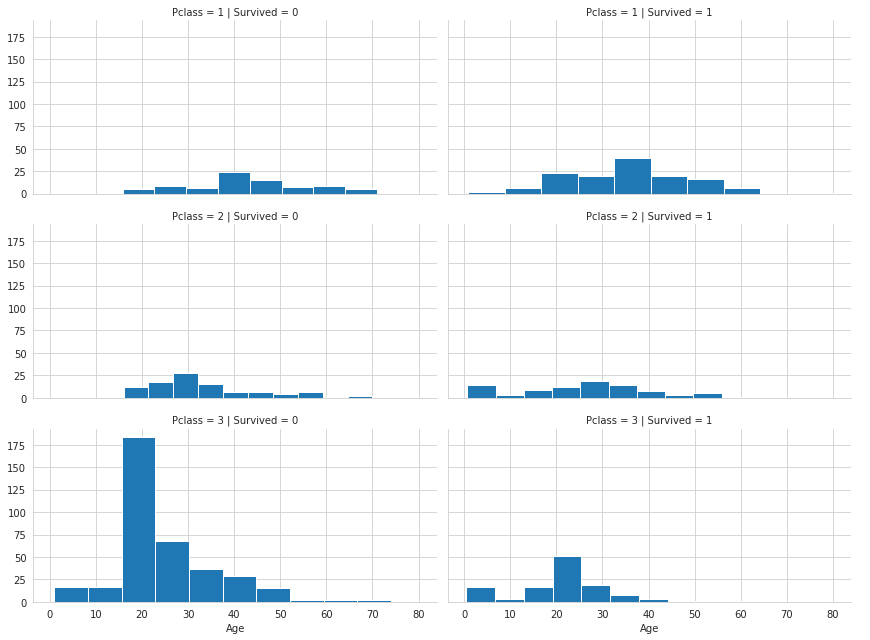

In [90]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', bins=10)
grid.add_legend()

>* Majority of the Passengers in the Third class lost their lives , these passengers were mostly between 20-30 years old.
>* The first class had the most survivors. These passenegrs were between 30-40 years old.

### Feature Engineering

>* I one hot encoded the Sex and Embarked columns of the Dataset.

In [91]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


>* I onehotencoded these columns then merged them with my dataset and dropped the Sex and Embarked columns from my dataset.

In [92]:
dummies = pd.get_dummies(train[['Embarked','Sex']],drop_first=True)

In [93]:
train = pd.concat([train,dummies],axis=1)

In [94]:
train.drop(['Embarked','Sex'],axis=1,inplace=True)

In [95]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


## Building the KNN model 80:20

>* I defined my Target and Features and split  the data with an 80:20 split.
>* Then I fit a KNN model.

In [96]:
X = train[['Pclass',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked_Q',	'Embarked_S',	'Sex_male']].values
y = train.Survived.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

>* I scaled the data in order to make my model more accurate.

In [97]:
#Scaling the Data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [98]:
#Defining the Parameter Range
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[3,5,13,15,17,21,31],
          'metric' : ['euclidean','manhattan','minkowski'],
          'weights':['uniform','distance',],
          }

grid = GridSearchCV(estimator= KNeighborsClassifier(),param_grid = params,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 13, 15, 17, 21, 31],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
# Obtaining the Best Parameters for my model.
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [100]:
knn = KNeighborsClassifier(n_neighbors=16,metric='manhattan',weights='uniform')
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred))

Accuracy Score :  0.8426966292134831


In [101]:
print('Confusion Matrix:')
confusion_matrix(y_test,y_pred)

Confusion Matrix:


array([[105,  10],
       [ 18,  45]])

>* The model had an accuracy_score of 84.26.

## Building the KNN model 70:30

>* I defined my Target and Features and split  the data with an 70:30 split.
>* Then I fit a KNN model.

In [102]:
X = train[['Pclass',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked_Q',	'Embarked_S',	'Sex_male']].values
y = train.Survived.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [103]:
# Scaling the Features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [104]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[3,5,9,11,13,15,17,21,31,41,43,45,51,53,55,57],
        
          }

grid = GridSearchCV(estimator= knn,param_grid = params,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='manhattan',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=16, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 9, 11, 13, 15, 17, 21, 31, 41,
                                         43, 45, 51, 53, 55, 57]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
grid.best_params_

{'n_neighbors': 5}

In [106]:
knn = KNeighborsClassifier(n_neighbors=12)
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8389513108614233


In [107]:
print('Confusion Matrix:')
confusion_matrix(y_test,y_pred)

Confusion Matrix:


array([[146,  14],
       [ 29,  78]])

>* The model had an accuracy of 83%

## Building the KNN model 60:40

>* I defined my Target and Features and split  the data with an 60:40 split.
>* Then I fit a KNN model.

In [108]:
X = train[['Pclass',	'Age',	'SibSp',	'Parch',	'Fare',	'Embarked_Q',	'Embarked_S',	'Sex_male']].values
y = train.Survived.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=10)

In [109]:
# Scaling the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


In [110]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' :[3,5,13,15,17,21,31,41,43,45,51,53,55,57],
          'metric' : ['euclidean','manhattan','minkowski'],
          'weights':['uniform','distance',],
          }

grid = GridSearchCV(estimator= KNeighborsClassifier(),param_grid = params,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 13, 15, 17, 21, 31, 41, 43, 45,
                                         51, 53, 55, 57],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [112]:
knn = KNeighborsClassifier(n_neighbors=14,metric='manhattan',weights='uniform')
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8370786516853933

In [113]:
confusion_matrix(y_test,y_pred)

array([[205,  17],
       [ 41,  93]])

>* The model had an accuracy of 83%

# Making Predictions with the test data


In [114]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


> *  I first checked for duplicated entries in my dataset.

In [115]:
test.duplicated().sum()

0

>* Finally I dropped the unnecessary columns from my dataset.

In [116]:
test.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

>* I then cleaned both datasets , checking for null entries or duplicated entries in my columns.

In [117]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

>* The Age column had 86 null entries.
>* I obtained the mean age of the passengers in my dataset by Passenger Class and Sex and then filled the null values on the Age columns with these means.

In [119]:
test.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    41.333333
        male      40.520000
2       female    24.376552
        male      30.940678
3       female    23.073400
        male      24.525104
Name: Age, dtype: float64

In [120]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    if pd.isnull(Age):
        if (Pclass == 1) & (Sex == 'female') :
            return 41
        elif (Pclass == 1) and (Sex == 'male'):
            return 40
        elif (Pclass == 2 ) and (Sex == 'female'):
          return 24
        elif (Pclass == 2) and (Sex == 'male'):
          return 30
        elif (Pclass == 3) and (Sex == 'female'):
          return 23
        elif (Pclass == 3) and (Sex == 'male'):
          return 24
    else:
        return Age

        

In [121]:
test['Age'] = test[['Age', 'Pclass','Sex']].apply(age_approx, axis=1)

In [122]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


>* Finally I dropped any null entries that were still within my dataset.

In [123]:
test.dropna(inplace=True)

In [124]:
test.isnull().sum().sum()

0

### Feature Engineering

>* I one hot encoded the Sex and Embarked columns of the Dataset.

In [126]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


>* I onehotencoded these columns then merged them with my dataset and dropped the Sex and Embarked columns from my dataset.

In [127]:
dummies = pd.get_dummies(test[['Embarked','Sex']],drop_first=True)

In [128]:
test = pd.concat([test,dummies],axis=1)

In [129]:
test.drop(['Embarked','Sex'],axis=1,inplace=True)

In [130]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,1,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,0,1,1
4,3,22.0,1,1,12.2875,0,1,0


### Fitting my model and making predictions.

In [136]:
knn = KNeighborsClassifier(n_neighbors=14,metric='manhattan',weights='uniform')
knn = knn.fit(X,y)
y_pred = knn.predict(test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

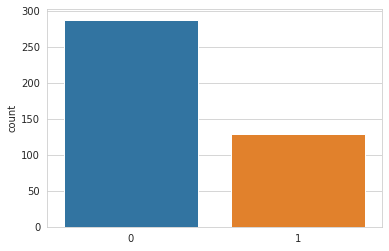

In [137]:
sns.countplot(x=y_pred)

# Conclusion

Ultimately for all three classification models the accuracy score of the model for predicting whether a Passenger Survived or not was between 83-84%. 
Although this was a good score perhaps using other models ,  such as the GradientBoostClassifier could allow for a higher score.
From the Test data the prediction is that majority of the passengers in the Titanic died.